In [37]:
import pandas as pd 
market = pd.read_csv('market.csv')

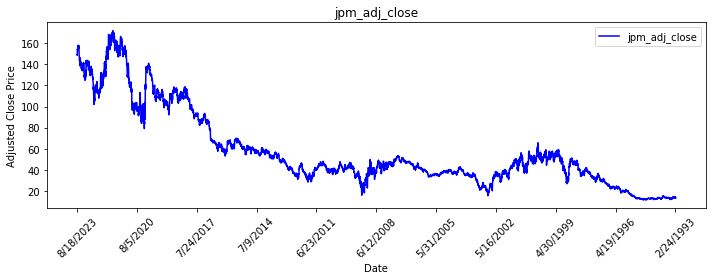

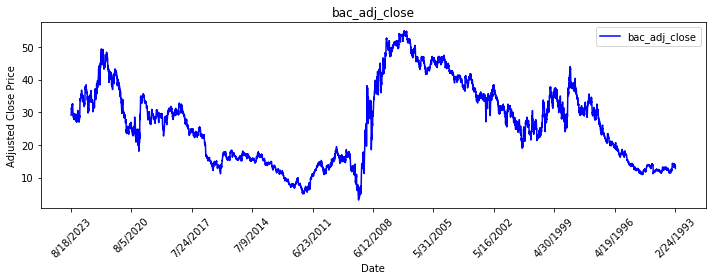

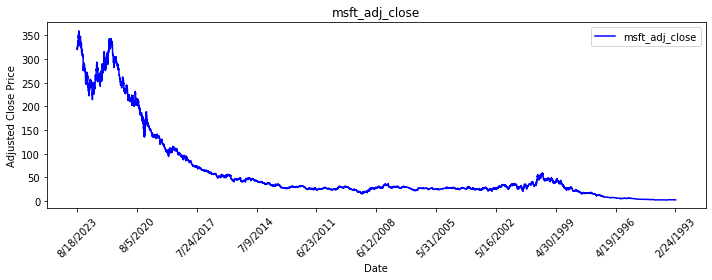

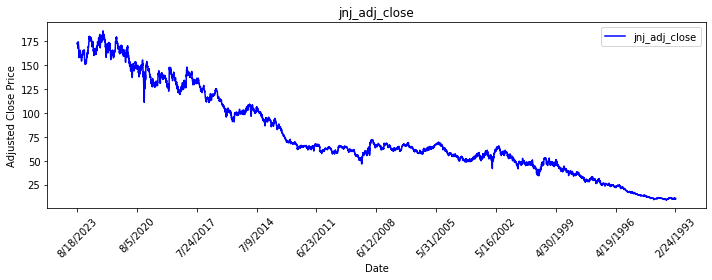

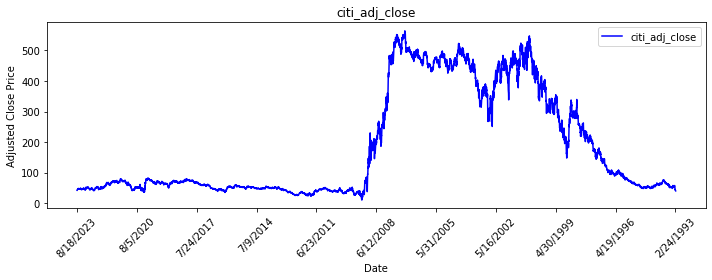

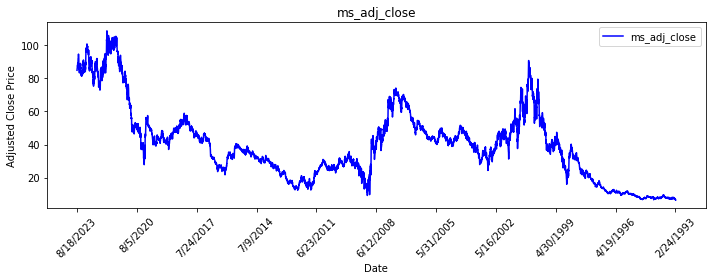

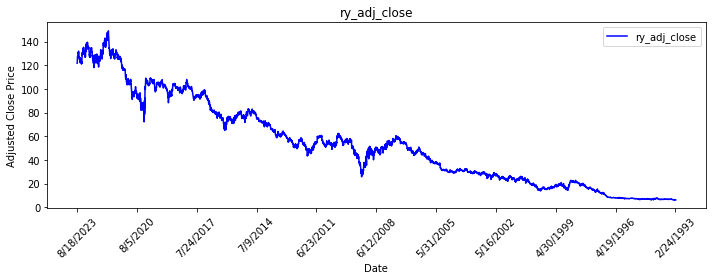

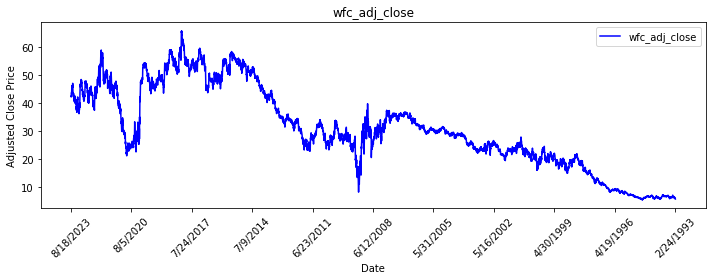

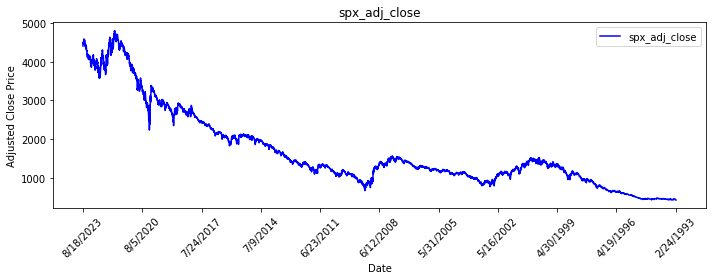

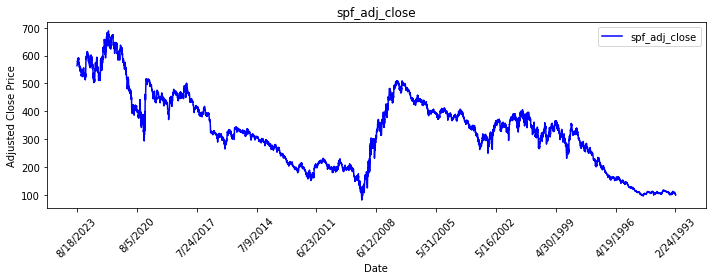

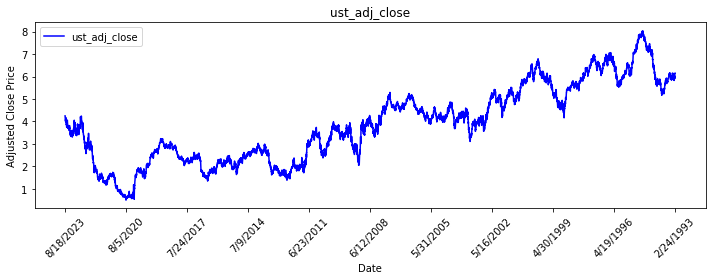

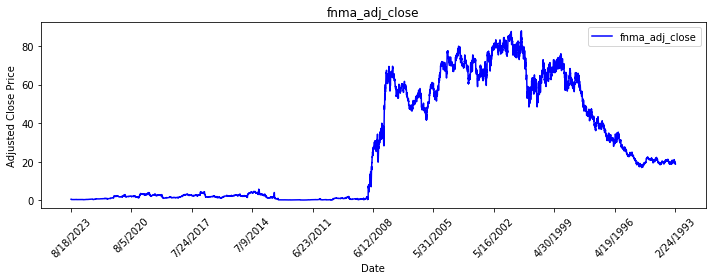

In [38]:
# Plotting each stock and index on its own individual plot
import matplotlib.pyplot as plt

# List of stock and index columns to plot
columns_to_plot = ['jpm_adj_close', 'bac_adj_close', 'msft_adj_close', 'jnj_adj_close', 'citi_adj_close', 
'ms_adj_close', 'ry_adj_close', 'wfc_adj_close', 'spx_adj_close', 'spf_adj_close', 'ust_adj_close', 'fnma_adj_close']

# Creating individual plots for each column
for col in columns_to_plot:
    plt.figure(figsize=(10, 4))
    plt.plot(market['Date'], market[col], label=col, color='blue')
    plt.title(col)
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.xticks(market['Date'][::len(market) // 10], rotation=45)  # Show only a subset of dates for clarity
    plt.legend()
    plt.tight_layout()
    plt.show()

## Univariate Analysis

In [39]:
market.describe()

,spf_adj_close,jpm_adj_close,jpm_volume,bac_adj_close,bac_volume,msft_adj_close,msft_volume,jnj_adj_close,jnj_volume,spx_adj_close,...,wfc_30d_ma,wfc_rsi,citi_10d_ma,citi_20d_ma,citi_30d_ma,citi_rsi,jpm_hist_vol_10,jpm_hist_vol_30,jpm_hist_vol_50,jpm_hist_vol_100
count,7645.000000,7645.000000,7.645000e+03,7645.000000,7.645000e+03,7645.000000,7.645000e+03,7645.000000,7.645000e+03,7645.000000,...,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000
mean,328.481126,57.307905,1.671869e+07,26.675044,6.397430e+07,61.470165,5.494379e+07,76.564298,8.109080e+06,1678.102458,...,31.177038,48.049084,183.951237,183.949170,183.944610,48.621493,30.142708,31.214425,31.583135,32.070213
std,132.939648,36.991168,1.785400e+07,12.256999,9.282520e+07,77.539061,3.288658e+07,45.162887,4.856882e+06,1031.345191,...,14.634429,15.419471,174.989778,174.897736,174.807242,16.493935,22.718589,20.711891,20.046226,19.188768
min,81.740000,11.375000,3.750000e+05,3.140000,4.228000e+05,2.218800,6.451200e+06,8.906300,1.134800e+06,431.900000,...,5.657307,2.828765,12.810000,18.260000,21.316667,3.245750,2.598000,7.040000,9.347000,11.912000
25%,215.340000,35.160000,7.116500e+06,15.420000,8.800000e+06,24.910000,3.216520e+07,48.437500,5.233481e+06,1051.330000,...,21.644810,37.498333,49.881010,50.006500,50.095000,36.714973,16.651000,18.743000,19.597000,20.173000
50%,327.610000,44.700000,1.150410e+07,27.000000,3.351358e+07,29.330000,4.918740e+07,63.230000,7.040831e+06,1315.450000,...,29.523167,47.836257,70.395000,70.364500,70.293333,48.148006,24.236000,25.278000,26.013000,26.542000
75%,409.680000,64.130000,1.912763e+07,35.187500,8.201960e+07,52.420000,6.830800e+07,106.700000,9.725899e+06,2088.870000,...,44.223333,58.792651,350.765340,347.398325,347.580000,60.344828,35.859000,36.223000,36.581000,35.678000
max,688.850000,171.780000,2.172942e+08,54.900000,1.226791e+09,359.490000,6.902832e+08,186.010000,9.844020e+07,4796.560000,...,63.178333,96.666667,553.500000,549.590000,548.156667,100.000000,215.470000,150.144000,145.423000,134.041000


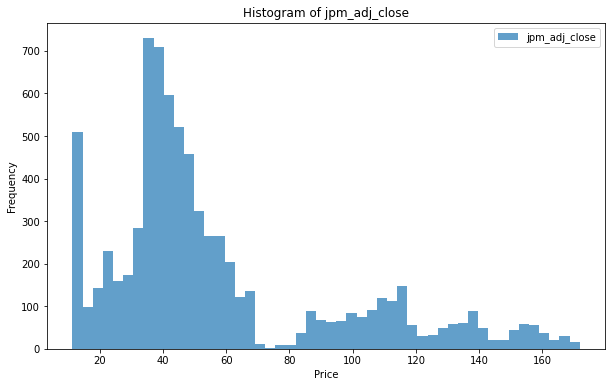

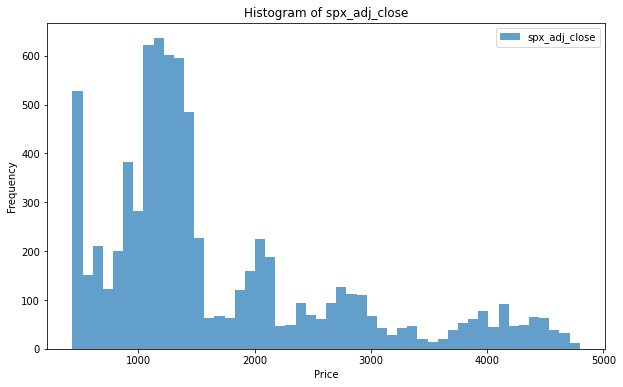

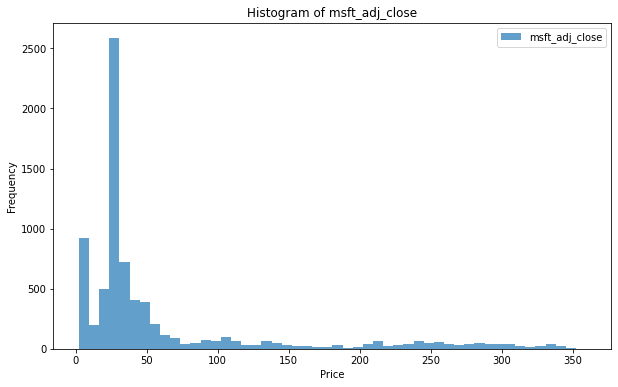

In [40]:
import matplotlib.pyplot as plt

stock_price_columns = [
    'jpm_adj_close', 'spx_adj_close', 'msft_adj_close',
    'bac_adj_close', 'citi_adj_close', 'ms_adj_close',
    'ry_adj_close', 'wfc_adj_close', 'jnj_adj_close',
    'spf_adj_close'
]

# Limiting to the first 3 stocks to prevent timeout and for readability
for col in stock_price_columns[:3]:  # Slicing to first 3 stocks for example
    plt.figure(figsize=(10, 6))
    plt.hist(market[col].dropna(), bins=50, alpha=0.7, label=col)  # Using .dropna() to remove NaN values that can't be histogrammed
    plt.title(f'Histogram of {col}')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

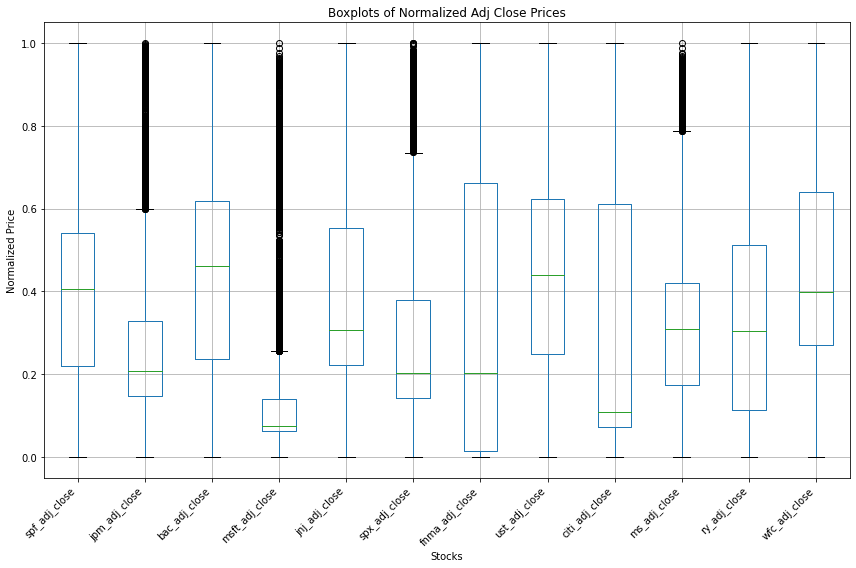

In [41]:
# Selecting only the 'adj_close' price columns from the market dataset
adj_close_columns = [col for col in market.columns if 'adj_close' in col]

# Extracting the relevant columns from the market dataset
adj_close_data = market[adj_close_columns]

from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the adj_close data
normalized_adj_close_data = scaler.fit_transform(adj_close_data)

# Convert the normalized data back to a DataFrame
normalized_adj_close_df = pd.DataFrame(normalized_adj_close_data, columns=adj_close_columns)

# Plotting boxplots for each normalized 'adj_close' price variable
plt.figure(figsize=(12, 8))
normalized_adj_close_df.boxplot(rot=90)
plt.title('Boxplots of Normalized Adj Close Prices')
plt.xlabel('Stocks')
plt.ylabel('Normalized Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Bivariate Analysis

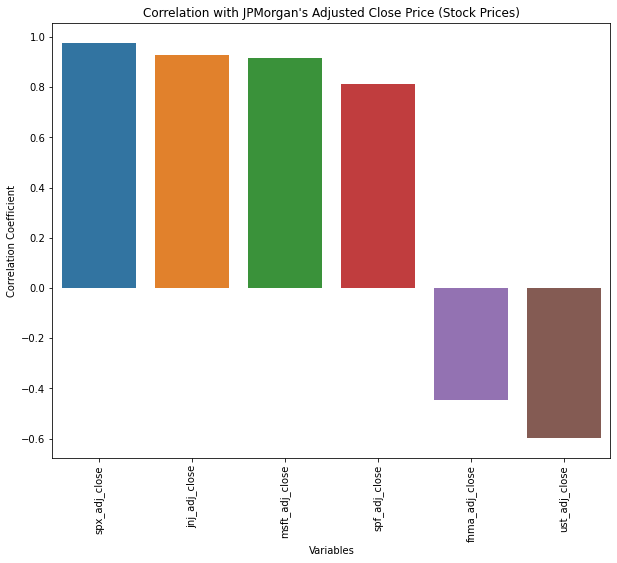

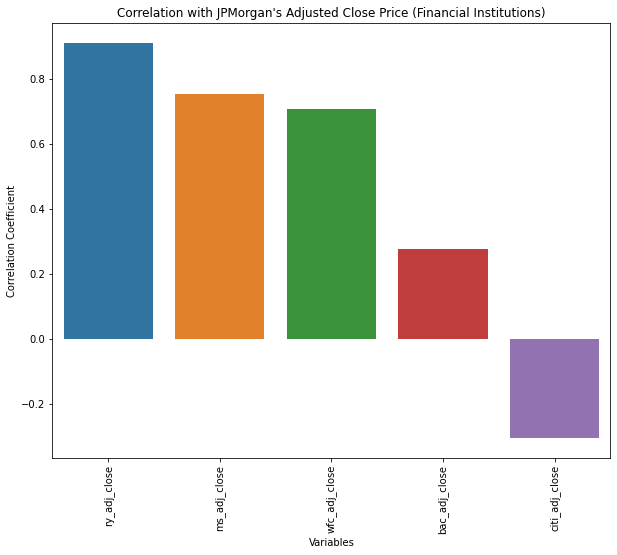

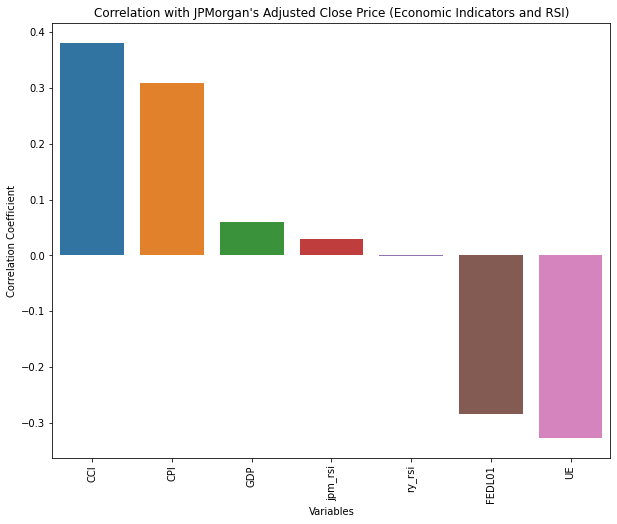

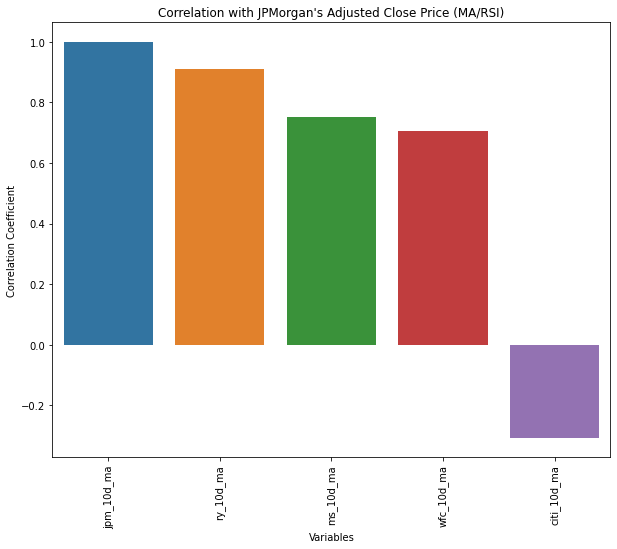

(spx_adj_close     0.976938
 jnj_adj_close     0.930295
 msft_adj_close    0.915856
 spf_adj_close     0.813688
 fnma_adj_close   -0.447438
 ust_adj_close    -0.597974
 Name: jpm_adj_close, dtype: float64,
 ry_adj_close      0.910815
 ms_adj_close      0.752427
 wfc_adj_close     0.706834
 bac_adj_close     0.275591
 citi_adj_close   -0.304846
 Name: jpm_adj_close, dtype: float64,
 CCI        0.380562
 CPI        0.308278
 GDP        0.059844
 jpm_rsi    0.030261
 ry_rsi    -0.000244
 FEDL01    -0.284262
 UE        -0.327094
 Name: jpm_adj_close, dtype: float64,
 jpm_10d_ma     0.998493
 ry_10d_ma      0.911330
 ms_10d_ma      0.752778
 wfc_10d_ma     0.705434
 citi_10d_ma   -0.306179
 Name: jpm_adj_close, dtype: float64)

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Date' is in datetime format
market['Date'] = pd.to_datetime(market['Date'])

# Define the lists of variables to correlate
correlation_1 = ['spx_adj_close', 'msft_adj_close', 'jnj_adj_close', 'fnma_adj_close', 'ust_adj_close', 'spf_adj_close']
correlation_2 = ['bac_adj_close', 'citi_adj_close', 'ms_adj_close', 'ry_adj_close', 'wfc_adj_close']
correlation_3 = ['CCI', 'UE', 'FEDL01', 'GDP', 'CPI', 'jpm_rsi', 'ry_rsi']
correlation_4 = ['jpm_10d_ma', 'ry_10d_ma', 'ms_10d_ma', 'citi_10d_ma', 'wfc_10d_ma']

# Function to plot correlation
def plot_correlation(corr_vars, title):
    # Calculate the correlation matrix
    correlation_matrix = market[corr_vars + ['jpm_adj_close']].corr()
    
    # Focus on correlations with JPMorgan's adjusted close price
    jpm_correlations = correlation_matrix['jpm_adj_close'].drop('jpm_adj_close').sort_values(ascending=False)
    
    # Plotting the correlations
    plt.figure(figsize=(10, 8))
    sns.barplot(x=jpm_correlations.index, y=jpm_correlations.values)
    plt.xticks(rotation=90)
    plt.title(title)
    plt.ylabel('Correlation Coefficient')
    plt.xlabel('Variables')
    plt.show()
    
    return jpm_correlations

# Plot the first correlation set
correlation_results_1 = plot_correlation(correlation_1, "Correlation with JPMorgan's Adjusted Close Price (Stock Prices)")

# Plot the second correlation set
correlation_results_2 = plot_correlation(correlation_2, "Correlation with JPMorgan's Adjusted Close Price (Financial Institutions)")

# Plot the third correlation set
correlation_results_3 = plot_correlation(correlation_3, "Correlation with JPMorgan's Adjusted Close Price (Economic Indicators and RSI)")

# Plot the third correlation set
correlation_results_4 = plot_correlation(correlation_4, "Correlation with JPMorgan's Adjusted Close Price (MA/RSI)")

correlation_results_1, correlation_results_2, correlation_results_3, correlation_results_4

In [43]:
correlation_jpm_spx = market['jpm_adj_close'].corr(market['spx_adj_close'])
correlation_jpm_msft = market['jpm_adj_close'].corr(market['msft_adj_close'])
correlation_jpm_jnj = market['jpm_adj_close'].corr(market['jnj_adj_close'])
correlation_jpm_UE = market['jpm_adj_close'].corr(market['UE'])
correlation_jpm_CCI = market['jpm_adj_close'].corr(market['CCI'])
correlation_jpm_FEDL01 = market['jpm_adj_close'].corr(market['FEDL01'])
correlation_jpm_20d_ma = market['jpm_adj_close'].corr(market['jpm_20d_ma'])
correlation_jpm_rsi = market['jpm_adj_close'].corr(market['jpm_rsi'])
correlation_jpm_ry = market['jpm_adj_close'].corr(market['ry_adj_close'])
correlation_jpm_wfc = market['jpm_adj_close'].corr(market['wfc_adj_close'])
correlation_jpm_ms = market['jpm_adj_close'].corr(market['ms_adj_close'])
correlation_jpm_citi = market['jpm_adj_close'].corr(market['citi_adj_close'])
correlation_jpm_spf = market['jpm_adj_close'].corr(market['spf_adj_close'])

print(correlation_jpm_spx)
print(correlation_jpm_msft)
print(correlation_jpm_jnj)
print(correlation_jpm_UE)
print(correlation_jpm_CCI)
print(correlation_jpm_FEDL01)
print(correlation_jpm_20d_ma)
print(correlation_jpm_rsi)
print(correlation_jpm_ry)
print(correlation_jpm_wfc)
print(correlation_jpm_ms)
print(correlation_jpm_citi)
print(correlation_jpm_spf)

0.976938059461772
0.9158564452109194
0.9302952142868574
-0.3270935359034694
0.3805619156628671
-0.28426217623127886
0.9968220947257568
0.030260832982651656
0.9108148855835061
0.706834022584377
0.7524266422538587
-0.3048456321306884
0.8136883931794422


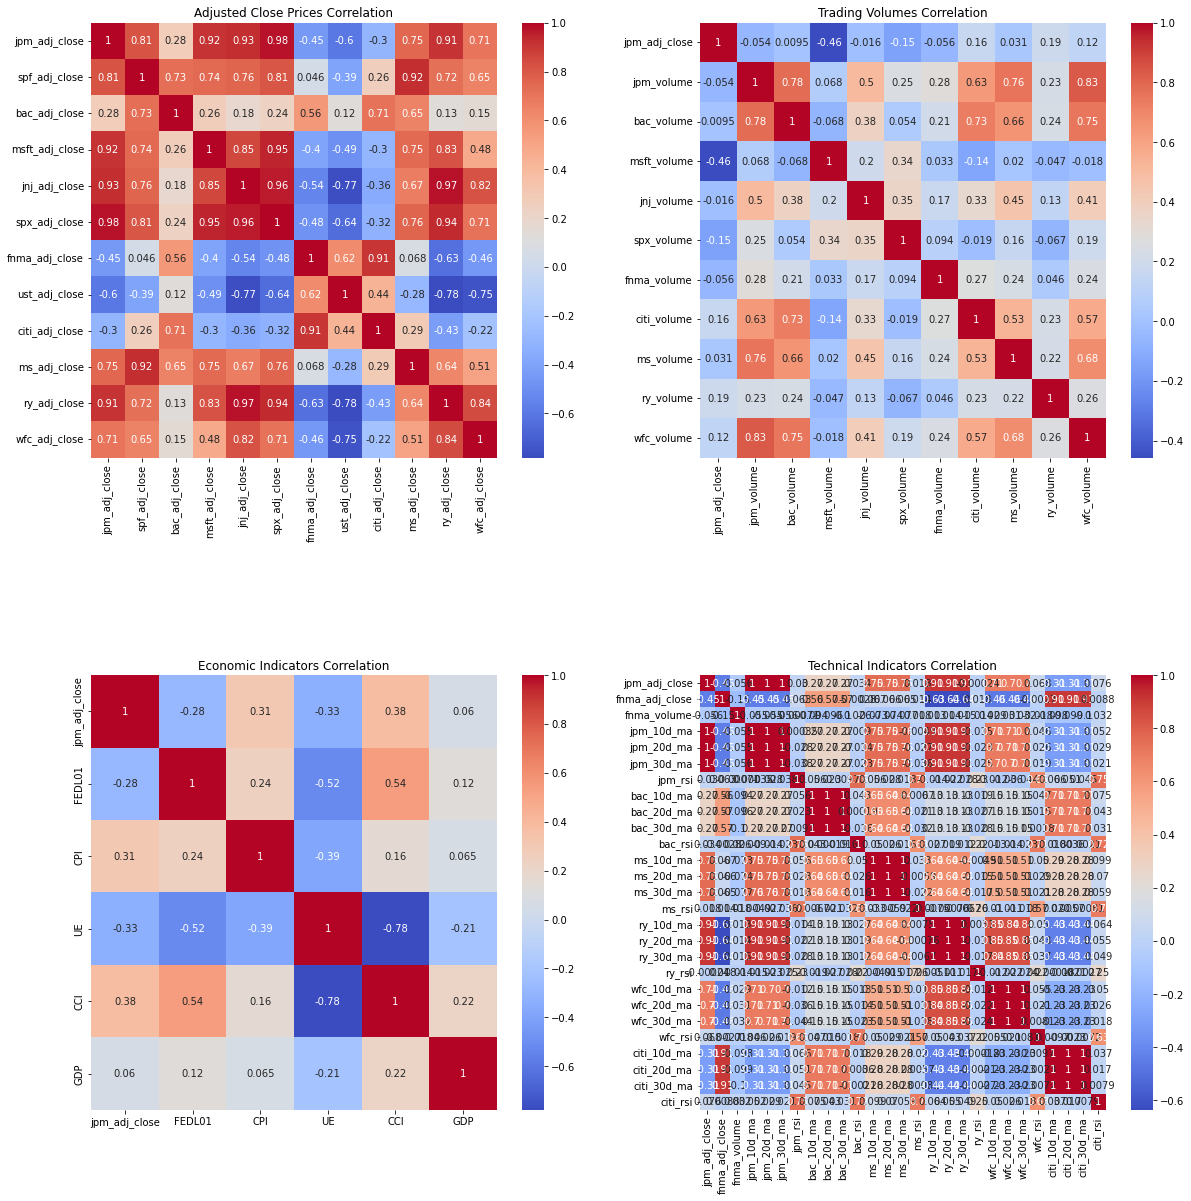

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter columns for each category, making sure to include 'jpm_adj_close'
adj_close_columns = ['jpm_adj_close'] + [col for col in market.columns if 'adj_close' in col and col != 'jpm_adj_close']
volume_columns = ['jpm_adj_close'] + [col for col in market.columns if 'volume' in col]
economic_indicators_columns = ['jpm_adj_close', 'FEDL01', 'CPI', 'UE', 'CCI', 'GDP']
technical_indicators_columns = ['jpm_adj_close'] + [col for col in market.columns if any(sub in col for sub in ['ma', 'rsi'])]
#volatility_columns = ['jpm_adj_close'] + [col for col in market.columns if any(sub in col for sub in ['vol'])]

# Create correlation matrices
adj_close_corr = market[adj_close_columns].corr()
volume_corr = market[volume_columns].corr()
economic_indicators_corr = market[economic_indicators_columns].corr()
technical_indicators_corr = market[technical_indicators_columns].corr()
#volatility_corr = market[volatility_columns].corr()

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

# Adjust space between plots
plt.subplots_adjust(hspace=0.5, wspace=0.2)

# Plotting the heatmaps
sns.heatmap(adj_close_corr, ax=axes[0, 0], annot=True, cmap='coolwarm')
axes[0, 0].set_title('Adjusted Close Prices Correlation')

sns.heatmap(volume_corr, ax=axes[0, 1], annot=True, cmap='coolwarm')
axes[0, 1].set_title('Trading Volumes Correlation')

sns.heatmap(economic_indicators_corr, ax=axes[1, 0], annot=True, cmap='coolwarm')
axes[1, 0].set_title('Economic Indicators Correlation')

sns.heatmap(technical_indicators_corr, ax=axes[1, 1], annot=True, cmap='coolwarm')
axes[1, 1].set_title('Technical Indicators Correlation')

#sns.heatmap(volatility_corr, ax=axes[1, 1], annot=True, cmap='coolwarm')
#axes[1, 1].set_title('Volatility Correlation')

plt.show()

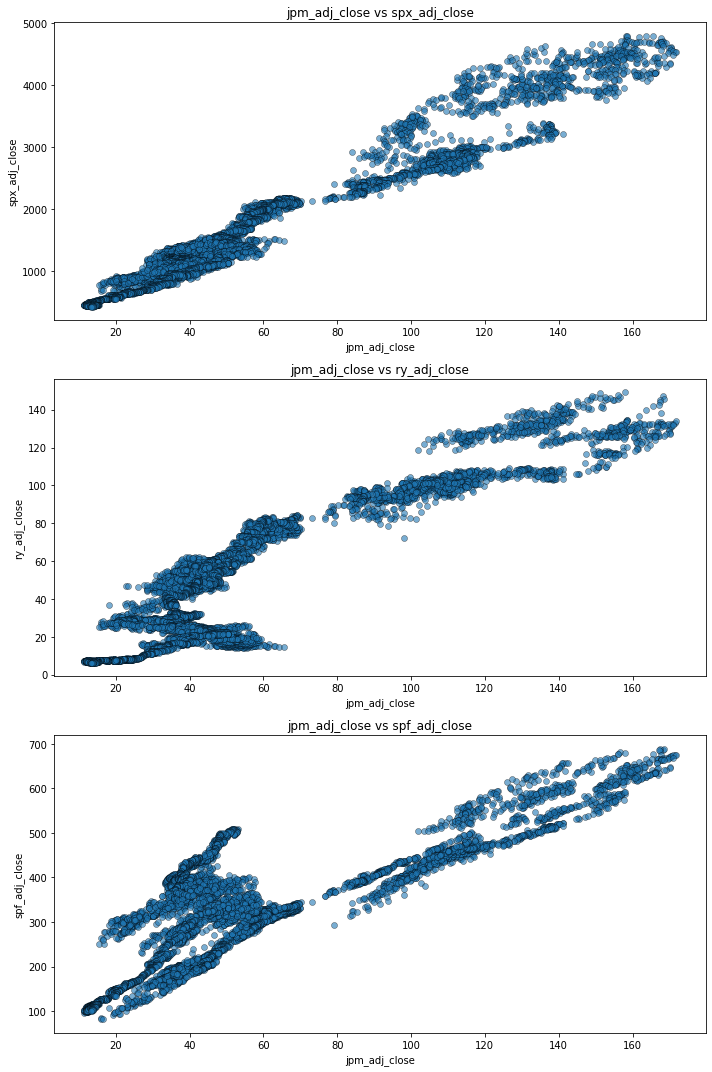

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of columns for the plots
y_variables = [
    'spx_adj_close', 'ry_adj_close', 'spf_adj_close'
    #'jpm_hist_vol_50', 'jpm_hist_vol_100',
    #'jnj_adj_close', 'jpm_20d_ma',
    #'ry_adj_close', 'jpm_rsi', 'jpm_hist_vol_10'
]

# Filter the dataframe to include only the selected columns along with 'jpm_adj_close'
market_subset = market[['jpm_adj_close'] + y_variables]

# Number of rows for subplots
n_rows = len(y_variables)

# Create a figure with subplots
plt.figure(figsize=(10, 5 * n_rows))

# Create individual scatter plots for each variable against 'jpm_adj_close'
for i, var in enumerate(y_variables, 1):
    plt.subplot(n_rows, 1, i)
    sns.scatterplot(x='jpm_adj_close', y=var, data=market_subset, edgecolor='k', alpha=0.6)
    plt.title(f'jpm_adj_close vs {var}')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [46]:
from sklearn.preprocessing import MinMaxScaler

# Selecting only the numerical features for normalization
numerical_data = market.select_dtypes(include=['float64', 'int64'])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
normalized_data = scaler.fit_transform(numerical_data)

# Creating a new DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=numerical_data.columns)

# Adding the 'Date' column back to the normalized dataframe
normalized_df.insert(0, 'Date', market['Date'])

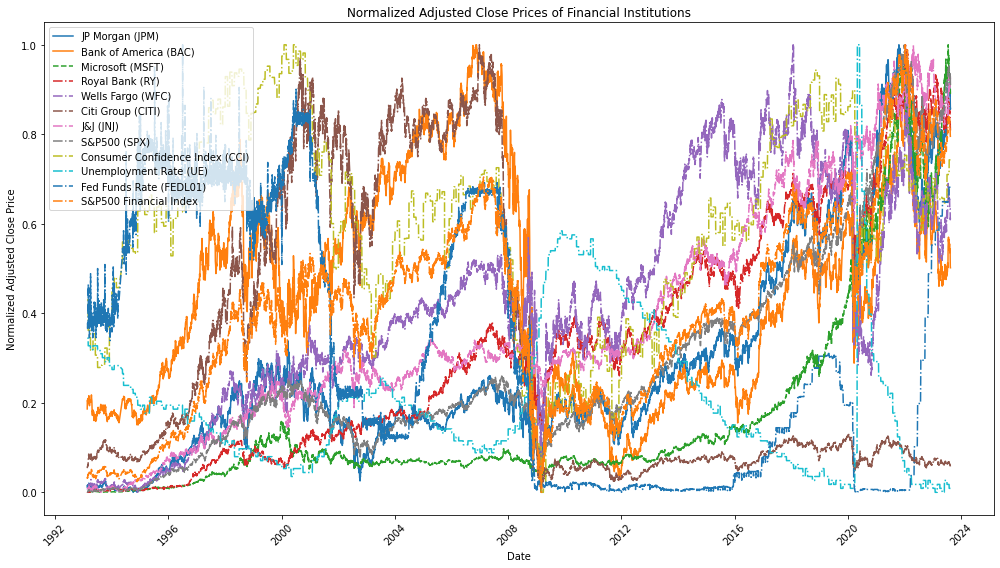

In [47]:
import matplotlib.pyplot as plt

# Preparing data for plotting
jpm_data = normalized_df[['Date', 'jpm_adj_close']]
bac_data = normalized_df[['Date', 'bac_adj_close']]
msft_data = normalized_df[['Date', 'msft_adj_close']]
ry_data = normalized_df[['Date', 'ry_adj_close']]  
wfc_data = normalized_df[['Date', 'wfc_adj_close']]  
citi_data = normalized_df[['Date', 'citi_adj_close']]  
jnj_data = normalized_df[['Date', 'jnj_adj_close']]
spx_data = normalized_df[['Date', 'spx_adj_close']]
CCI_data = normalized_df[['Date', 'CCI']]
UE_data = normalized_df[['Date', 'UE']]
FEDL01_data = normalized_df[['Date', 'FEDL01']]
spf_data = normalized_df[['Date', 'spf_adj_close']]


# Plotting
plt.figure(figsize=(14, 8))

plt.plot(jpm_data['Date'], jpm_data['jpm_adj_close'], label='JP Morgan (JPM)')
plt.plot(bac_data['Date'], bac_data['bac_adj_close'], label='Bank of America (BAC)')
plt.plot(msft_data['Date'], msft_data['msft_adj_close'], label='Microsoft (MSFT)', linestyle='--')  # Not a financial institution, but included
plt.plot(ry_data['Date'], ry_data['ry_adj_close'], label='Royal Bank (RY)', linestyle='-.')
plt.plot(wfc_data['Date'], wfc_data['wfc_adj_close'], label='Wells Fargo (WFC)', linestyle='-.')
plt.plot(citi_data['Date'], citi_data['citi_adj_close'], label='Citi Group (CITI)', linestyle='-.')
plt.plot(jnj_data['Date'], jnj_data['jnj_adj_close'], label='J&J (JNJ)', linestyle='-.')
plt.plot(spx_data['Date'], spx_data['spx_adj_close'], label='S&P500 (SPX)', linestyle='-.')
plt.plot(CCI_data['Date'], CCI_data['CCI'], label='Consumer Confidence Index (CCI)', linestyle='-.')
plt.plot(UE_data['Date'], UE_data['UE'], label='Unemployment Rate (UE)', linestyle='-.')
plt.plot(FEDL01_data['Date'], FEDL01_data['FEDL01'], label='Fed Funds Rate (FEDL01)', linestyle='-.')
plt.plot(spf_data['Date'], spf_data['spf_adj_close'], label='S&P500 Financial Index', linestyle='-.')


plt.title('Normalized Adjusted Close Prices of Financial Institutions')
plt.xlabel('Date')
plt.ylabel('Normalized Adjusted Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## Interactive plot

In [ ]:
import plotly.express as px
import pandas as pd

# Assuming normalized_df contains datetime objects in the 'Date' column
normalized_df['Date'] = pd.to_datetime(normalized_df['Date'])

# Plotting
fig = px.line(normalized_df, x='Date', y=['jpm_adj_close', 'bac_adj_close', 'ms_adj_close','msft_adj_close', 'ry_adj_close', 'wfc_adj_close', 'citi_adj_close', 'jnj_adj_close', 'spx_adj_close', 'UE', 'CCI', 'FEDL01'],
            labels={'variable': 'Stock', 'value': 'Normalized Adjusted Close Price'},
            title='Normalized Adjusted Close Prices',
            hover_name='variable', hover_data={'Date': True, 'value': True}, template='plotly_white')

fig.update_traces(mode='lines+markers', marker = dict(size = .5))

fig.update_layout(hovermode='x unified')

fig.show()

In [48]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Replace 'feature1', 'feature2', etc., with actual column names from your DataFrame.
features = ['jpm_adj_close', 'jnj_adj_close', 'msft_adj_close', 'spf_adj_close', 'spx_adj_close', 'bac_adj_close', 'wfc_adj_close', 
            'ry_adj_close', 'ms_adj_close', 'citi_adj_close', 'UE', 'FEDL01', 'CCI', 'jpm_20d_ma', 'jpm_rsi']  # Add other feature names as strings in this list

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected features
normalized_df_scaled_features = scaler.fit_transform(normalized_df[features])

# Creating a new DataFrame for the scaled features
normalized_df_scaled = pd.DataFrame(normalized_df_scaled_features, columns=features)

# Optionally, if you want to include the scaled features back into your original DataFrame:
for feature in features:
    normalized_df[f'scaled_{feature}'] = normalized_df_scaled[feature]

MSE for train-test split: 0.0008648404634791826
Random Forest Feature Importance Rankings:
jpm_20d_ma: 0.9692
spx_adj_close: 0.0253
jpm_rsi: 0.0039
FEDL01: 0.0005
UE: 0.0004
jnj_adj_close: 0.0003
CCI: 0.0003
msft_adj_close: 0.0002


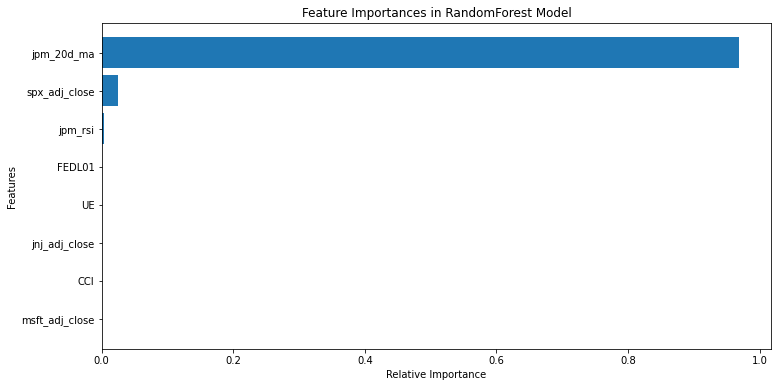

Average MSE with 5-fold cross-validation: 0.239


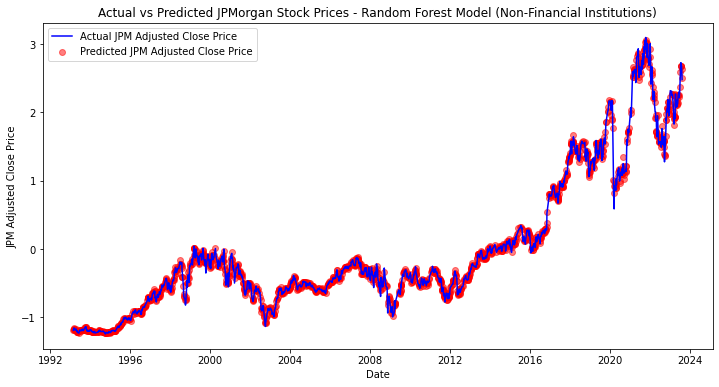

MSE: 0.0008648404634791826
RMSE: 0.029408170012416322
R^2: 0.9991747216543598
Size of X_train: 6116
Size of X_test: 1529
Size of y_train: 6116
Size of y_test: 1529
CV MSE: 0.23872955520569863


In [49]:
# Code for model including other companies not in the financial industry and economic indicators.

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score  # Import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming normalized_df_scaled includes all necessary features and the target variable
features = ['spx_adj_close', 'jnj_adj_close', 'msft_adj_close', 'CCI', 
            'UE', 'FEDL01', 'jpm_20d_ma', 'jpm_rsi']
target = 'jpm_adj_close'

# Split your normalized data while keeping 'Date' if it's included
X = normalized_df_scaled[features]
y = normalized_df_scaled[target]
dates = normalized_df['Date']  # Make sure 'Date' is still in the original normalized_df if needed
X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(
    X, y, dates, test_size=0.2, random_state=42
)

# Ensure that the test set is sorted by date
test_set_sorted = pd.DataFrame({'Date': dates_test, 'Actual': y_test}).sort_values('Date')
X_test_sorted = X_test.reindex(test_set_sorted.index)


# Train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the sorted test set
y_pred_rf = rf_model.predict(X_test_sorted)

# Calculate performance metrics for train-test split
mse_rf = mean_squared_error(test_set_sorted['Actual'], y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(test_set_sorted['Actual'], y_pred_rf)

# Print MSE for train-test split
print(f'MSE for train-test split: {mse_rf}')

# Perform k-fold cross-validation
k = 5  # Number of folds
cv_scores = cross_val_score(rf_model, X, y, cv=k, scoring='neg_mean_squared_error')

# Convert negative MSE to positive value
cv_scores_positive = -cv_scores

# Calculate the average MSE across all folds
avg_mse_cv = cv_scores_positive.mean()

# Get feature importance from the RandomForest model
feature_importances_rf = rf_model.feature_importances_

# Get the feature names from your dataset
features = np.array(features)  # Assuming 'features' list is already defined as in your snippet

# Sort the features by their importance
sorted_idx_rf = np.argsort(feature_importances_rf)[::-1]

# Print the feature importance rankings
print("Random Forest Feature Importance Rankings:")
for i in sorted_idx_rf:
    print(f"{features[i]}: {feature_importances_rf[i]:.4f}")

# Plotting the feature importances for RandomForest
plt.figure(figsize=(12, 6))
plt.title("Feature Importances in RandomForest Model")
plt.barh(range(len(sorted_idx_rf)), feature_importances_rf[sorted_idx_rf], align='center')
plt.yticks(range(len(sorted_idx_rf)), features[sorted_idx_rf])
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.xlabel("Relative Importance")
plt.ylabel("Features")
plt.show()

# Print the average MSE for cross-validation
print(f'Average MSE with {k}-fold cross-validation: {avg_mse_cv:.3f}')

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_set_sorted['Date'], test_set_sorted['Actual'], label='Actual JPM Adjusted Close Price', color='blue')
plt.scatter(test_set_sorted['Date'], y_pred_rf, label='Predicted JPM Adjusted Close Price', color='red', alpha=0.5)
plt.title('Actual vs Predicted JPMorgan Stock Prices - Random Forest Model (Non-Financial Institutions)')
plt.xlabel('Date')
plt.ylabel('JPM Adjusted Close Price')
plt.legend()
plt.show()

# Output the performance metrics for train-test split
print(f'MSE: {mse_rf}')
print(f'RMSE: {rmse_rf}')
print(f'R^2: {r2_rf}')

# Print the size of the train and test sets
print(f"Size of X_train: {len(X_train)}")
print(f"Size of X_test: {len(X_test)}")
print(f"Size of y_train: {len(y_train)}")
print(f"Size of y_test: {len(y_test)}")
print(f"CV MSE: {avg_mse_cv}")

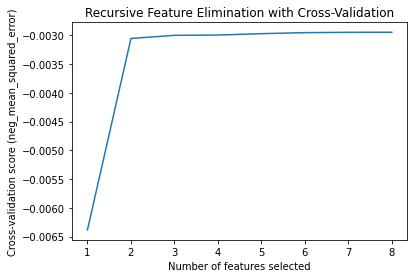

Optimal number of features : 8
Selected features:  ['spx_adj_close' 'jnj_adj_close' 'msft_adj_close' 'CCI' 'UE' 'FEDL01'
 'jpm_20d_ma' 'jpm_rsi']


In [50]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Linear regression model for RFE
model_lr = LinearRegression()

# RFE with cross-validation
rfe_cv = RFECV(estimator=model_lr, step=1, cv=5, scoring='neg_mean_squared_error')
rfe_cv.fit(X_train, y_train)

# Plotting the number of features VS. cross-validation scores
plt.figure()
plt.title('Recursive Feature Elimination with Cross-Validation')
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (neg_mean_squared_error)")
plt.plot(range(1, len(rfe_cv.cv_results_['mean_test_score']) + 1), rfe_cv.cv_results_['mean_test_score'])
plt.show()

print("Optimal number of features : %d" % rfe_cv.n_features_)
# Make sure `features` is a numpy array or adjust this line to match your actual features list handling
print('Selected features: ', np.array(features)[rfe_cv.support_])

In [51]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

# Load your data
df = pd.read_csv('market.csv')

# Assume that you have already chosen which features to include
features = ['spx_adj_close', 'jnj_adj_close', 'msft_adj_close', 'CCI', 
            'UE', 'FEDL01', 'jpm_20d_ma', 'jpm_rsi'] # replace with your actual feature names
target = ['jpm_adj_close']  # replace with your actual target column name

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected features
scaled_features = scaler.fit_transform(df[features])

# Initialize PCA - choosing to keep 95% of variance
pca = PCA(n_components=0.95)
pca_features = pca.fit_transform(scaled_features)

# Create a DataFrame from the PCA results and target for cross-validation
X = pd.DataFrame(pca_features)
y = df[target]

# Define the Linear Regression model
model1 = LinearRegression()

# Perform k-fold cross-validation
k = 5  # Number of folds
cv_scores = cross_val_score(model1, X, y, cv=k, scoring='neg_mean_squared_error')

# Convert negative MSE to positive value
cv_scores_positive = -cv_scores

# Calculate the average MSE across all folds
avg_mse_cv = cv_scores_positive.mean()

# Print the average MSE
print(f'Average MSE with {k}-fold cross-validation: {avg_mse_cv:.3f}')

Average MSE with 5-fold cross-validation: 159.823


Ridge best parameters: {'alpha': 0.5523117123602399}, with MSE: 0.0029
Lasso best parameters: {'alpha': 0.5523117123602399}, with MSE: 0.3152
Ridge - MSE: 0.0027066219095392514, RMSE: 0.05202520456028262, R^2: 0.9974171924810363
Lasso - MSE: 0.33594489050496595, RMSE: 0.5796075314425839, R^2: 0.6794229049518969


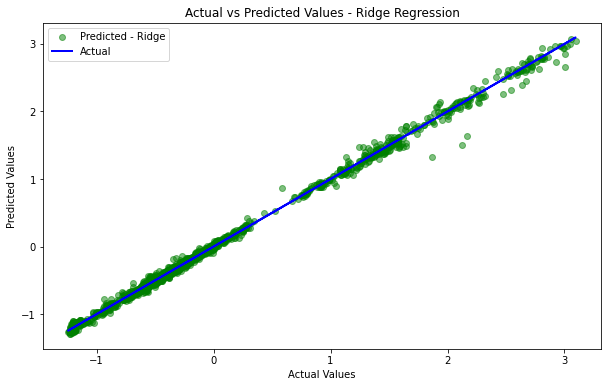

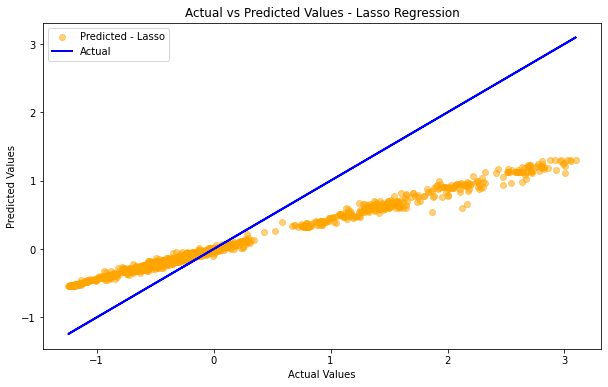

In [52]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from scipy.stats import uniform
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Define the hyperparameter distributions for Ridge and Lasso
ridge_dist = {'alpha': uniform(1e-4, 100)}  # Uniform distribution over the range [1e-4, 100]
lasso_dist = {'alpha': uniform(1e-4, 100)}  # Uniform distribution over the same range

# Setting up the Ridge and Lasso models
ridge = Ridge()
lasso = Lasso()

# Setting up RandomizedSearchCV for Ridge
ridge_random_cv = RandomizedSearchCV(ridge, ridge_dist, n_iter=100, scoring='neg_mean_squared_error', cv=5, random_state=42)
ridge_random_cv.fit(X_train, y_train)

# Setting up RandomizedSearchCV for Lasso
lasso_random_cv = RandomizedSearchCV(lasso, lasso_dist, n_iter=100, scoring='neg_mean_squared_error', cv=5, random_state=42)
lasso_random_cv.fit(X_train, y_train)

# Extracting the best parameters and scores
ridge_best_params = ridge_random_cv.best_params_
ridge_best_score = -ridge_random_cv.best_score_

lasso_best_params = lasso_random_cv.best_params_
lasso_best_score = -lasso_random_cv.best_score_

# Print the best parameters and scores for Ridge and Lasso
print(f"Ridge best parameters: {ridge_best_params}, with MSE: {ridge_best_score:.4f}")
print(f"Lasso best parameters: {lasso_best_params}, with MSE: {lasso_best_score:.4f}")

# Evaluating the models with the best parameters on the test set
ridge_best_model = Ridge(**ridge_best_params)
lasso_best_model = Lasso(**lasso_best_params)

# Fitting the models with the best parameters
ridge_best_model.fit(X_train, y_train)
lasso_best_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_ridge = ridge_best_model.predict(X_test)
y_pred_lasso = lasso_best_model.predict(X_test)

# Calculating MSE, RMSE, and R² for Ridge and Lasso
mse_ridge, rmse_ridge, r2_ridge = mean_squared_error(y_test, y_pred_ridge), np.sqrt(mean_squared_error(y_test, y_pred_ridge)), r2_score(y_test, y_pred_ridge)
mse_lasso, rmse_lasso, r2_lasso = mean_squared_error(y_test, y_pred_lasso), np.sqrt(mean_squared_error(y_test, y_pred_lasso)), r2_score(y_test, y_pred_lasso)

# Output the performance metrics for Ridge and Lasso
print(f"Ridge - MSE: {mse_ridge}, RMSE: {rmse_ridge}, R^2: {r2_ridge}")
print(f"Lasso - MSE: {mse_lasso}, RMSE: {rmse_lasso}, R^2: {r2_lasso}")

# Plotting for Ridge Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, color='green', alpha=0.5, label='Predicted - Ridge')
plt.plot(y_test, y_test, color='blue', label='Actual', linewidth=2)
plt.title('Actual vs Predicted Values - Ridge Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Plotting for Lasso Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, color='orange', alpha=0.5, label='Predicted - Lasso')
plt.plot(y_test, y_test, color='blue', label='Actual', linewidth=2)
plt.title('Actual vs Predicted Values - Lasso Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A colu

GBM 5-fold CV Average MSE: 394.998
GBM 5-fold CV MSE Standard Deviation: 645.107


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature Importance Rankings:
spx_adj_close: 0.9790
jnj_adj_close: 0.0150
CCI: 0.0044
msft_adj_close: 0.0016


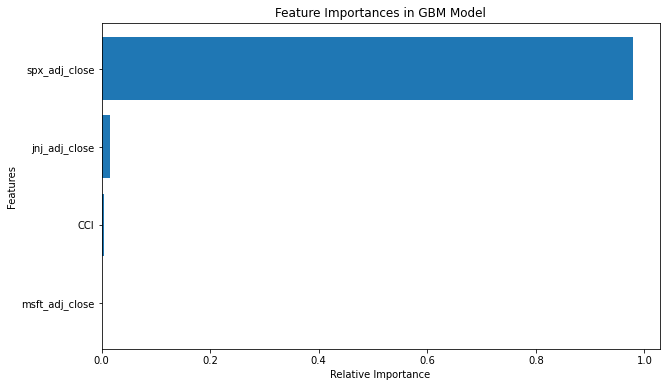

In [53]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Initialize the Gradient Boosting Machines model
gbm_model = GradientBoostingRegressor(random_state=42)

# Number of folds for cross-validation
k = 5

# Perform k-fold cross-validation
cv_scores_gbm = cross_val_score(gbm_model, X, y, cv=k, scoring='neg_mean_squared_error')

# Convert the scores to positive MSE
cv_scores_gbm_positive = -cv_scores_gbm

# Calculate the average and standard deviation of the MSE across all folds
avg_mse_gbm_cv = np.mean(cv_scores_gbm_positive)
std_mse_gbm_cv = np.std(cv_scores_gbm_positive)

# Print the cross-validation results
print(f'GBM {k}-fold CV Average MSE: {avg_mse_gbm_cv:.3f}')
print(f'GBM {k}-fold CV MSE Standard Deviation: {std_mse_gbm_cv:.3f}')

# Fit the GBM model to the entire dataset for feature importance analysis
gbm_model.fit(X, y)

features_list = ['spx_adj_close', 'jnj_adj_close', 'msft_adj_close', 'CCI', 
                    'UE', 'FEDL01', 'jpm_20d_ma', 'jpm_rsi']
target = 'jpm_adj_close'

# Get feature importance
feature_importances_gbm = gbm_model.feature_importances_

# Assuming 'features_list' contains the names of the features used
features = np.array(features_list)  

# Sort features by their importance
sorted_idx = np.argsort(feature_importances_gbm)[::-1]

# Print the feature importance rankings
print("Feature Importance Rankings:")
for i in sorted_idx:
    print(f"{features[i]}: {feature_importances_gbm[i]:.4f}")

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances in GBM Model")
plt.barh(range(len(sorted_idx)), feature_importances_gbm[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features[sorted_idx])
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.xlabel("Relative Importance")
plt.ylabel("Features")
plt.show()

Best parameters found for GBM:  {'learning_rate': 0.192332830588, 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 108, 'subsample': 0.7047898756660642}
Best score found for GBM:  957.0164523022737
Feature Importance Rankings for Best GBM Model:
jpm_20d_ma: 0.5650
msft_adj_close: 0.2215
spx_adj_close: 0.1154
jnj_adj_close: 0.0703
CCI: 0.0168
FEDL01: 0.0056
UE: 0.0026
jpm_rsi: 0.0026


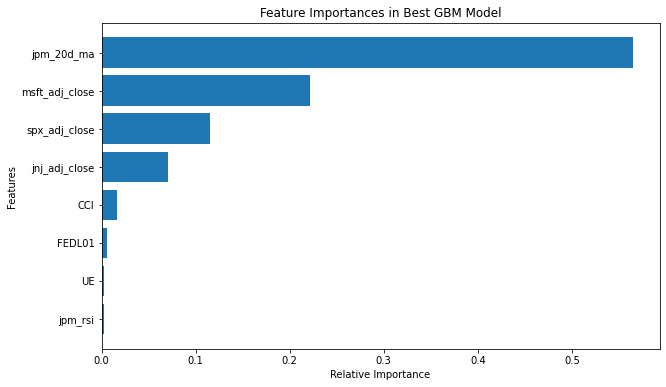

In [54]:
# hyperparameter tuning attempt:

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score  # Import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the marketset
market = pd.read_csv('market.csv')

# Convert 'Date' to datetime format
market['Date'] = pd.to_datetime(market['Date'])

# Sort the market marketFrame by 'Date' to ensure correct time series plotting
market.sort_values('Date', inplace=True)

# Assuming you have already defined 'features' which are your model features and do not include 'Date'
features = ['spx_adj_close', 'jnj_adj_close', 'msft_adj_close', 'CCI', 
                    'UE', 'FEDL01', 'jpm_20d_ma', 'jpm_rsi']
target = 'jpm_adj_close'

# Split your market while keeping the 'Date' column to use later for plotting
X = market[features]
y = market[target]
dates = market['Date']
X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(
    X, y, dates, test_size=0.2, random_state=42
)

# Ensure that the test set is sorted by date
test_set_sorted = pd.DataFrame({'Date': dates_test, 'Actual': y_test}).sort_values('Date')
X_test_sorted = X_test.reindex(test_set_sorted.index)

# Initialize the Gradient Boosting Machines model
gbm_model = GradientBoostingRegressor(random_state=42)

# Adjusted hyperparameter distribution to sample from
param_dist_gbm = {
    'n_estimators': sp_randint(100, 300),  # More constrained range for n_estimators
    'max_depth': sp_randint(3, 5),  # Lower maximum depth to reduce model complexity
    'min_samples_split': sp_randint(2, 9),  # Slightly narrowed range
    'min_samples_leaf': sp_randint(1, 9),  # Slightly narrowed range
    'learning_rate': uniform(0.05, 0.15),  # Focused range around typical good values
    'subsample': uniform(0.7, 0.3),  # More focused range to likely good values
    'max_features': ['sqrt', 'log2'],  # Restricting to options that generally reduce training time
}

# Setting up RandomizedSearchCV with fewer iterations and simplified cross-validation to speed up
gbm_random_search = RandomizedSearchCV(
    gbm_model, param_distributions=param_dist_gbm, n_iter=10, cv=3,
    scoring='neg_mean_squared_error', random_state=42, n_jobs=-1
)

# Fit RandomizedSearchCV to find the best parameters
gbm_random_search.fit(X, y)

# Print the best parameters and the corresponding score
print("Best parameters found for GBM: ", gbm_random_search.best_params_)
print("Best score found for GBM: ", -gbm_random_search.best_score_)

# Using the best estimator directly from the random search
best_gbm_model = gbm_random_search.best_estimator_

# Fit the GBM model with the best parameters found
best_gbm_model.fit(X, y)

# Get feature importance from the best GBM model
feature_importances_best_gbm = best_gbm_model.feature_importances_

# Assuming 'features_list' contains the names of the features used
features = np.array(features)  # Making sure to use the correct features list

# Sort the features by their importance
sorted_idx_best_gbm = np.argsort(feature_importances_best_gbm)[::-1]

# Print the feature importance rankings for the best GBM model
print("Feature Importance Rankings for Best GBM Model:")
for i in sorted_idx_best_gbm:
    print(f"{features[i]}: {feature_importances_best_gbm[i]:.4f}")

# Plotting the feature importances for the best GBM model
plt.figure(figsize=(10, 6))
plt.title("Feature Importances in Best GBM Model")
plt.barh(range(len(sorted_idx_best_gbm)), feature_importances_best_gbm[sorted_idx_best_gbm], align='center')
plt.yticks(range(len(sorted_idx_best_gbm)), features[sorted_idx_best_gbm])
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.xlabel("Relative Importance")
plt.ylabel("Features")
plt.show()

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
import numpy as np

# Training SVM and Elastic Net models
svm_model = SVR()
svm_model.fit(X_train, y_train)

elastic_net_model = ElasticNet()
elastic_net_model.fit(X_train, y_train)

# Number of folds for cross-validation
k = 5

# Perform k-fold cross-validation for the SVM model
svm_cv_scores = cross_val_score(svm_model, X, y, cv=k, scoring='neg_mean_squared_error')
# Convert to positive MSE and calculate average and standard deviation
svm_cv_scores_positive = -svm_cv_scores
avg_mse_svm_cv = np.mean(svm_cv_scores_positive)
std_mse_svm_cv = np.std(svm_cv_scores_positive)

# Perform k-fold cross-validation for the Elastic Net model
elastic_net_cv_scores = cross_val_score(elastic_net_model, X, y, cv=k, scoring='neg_mean_squared_error')
# Convert to positive MSE and calculate average and standard deviation
elastic_net_cv_scores_positive = -elastic_net_cv_scores
avg_mse_elastic_net_cv = np.mean(elastic_net_cv_scores_positive)
std_mse_elastic_net_cv = np.std(elastic_net_cv_scores_positive)

# Print the results for SVM
print(f'SVM {k}-fold CV Average MSE: {avg_mse_svm_cv:.3f}, Standard Deviation: {std_mse_svm_cv:.3f}')
# Print the results for Elastic Net
print(f'Elastic Net {k}-fold CV Average MSE: {avg_mse_elastic_net_cv:.3f}, Standard Deviation: {std_mse_elastic_net_cv:.3f}')

SVM 5-fold CV Average MSE: 883.494, Standard Deviation: 1587.052
Elastic Net 5-fold CV Average MSE: 5.024, Standard Deviation: 5.643


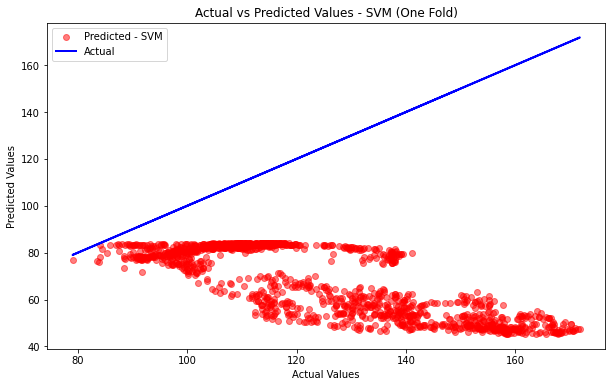

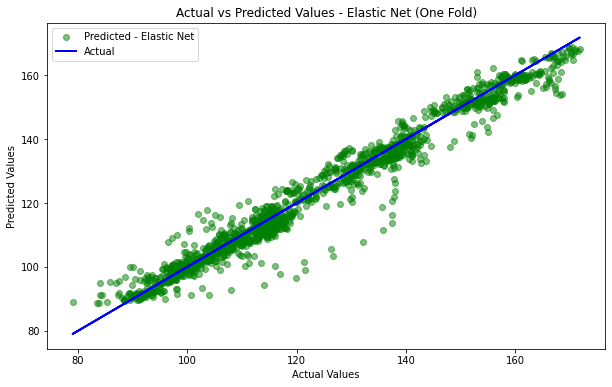

Average MSE for SVM with 5-fold cross-validation: 883.4944534309077
Average MSE for Elastic Net with 5-fold cross-validation: 5.024206344327586


In [56]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming X and y have been defined
k = 5
kf = KFold(n_splits=k)

# Initialize lists to store fold-wise results
svm_mse_scores, elastic_net_mse_scores = [], []

# Perform k-fold cross-validation manually to capture test indices
for train_index, test_index in kf.split(X):
    # Split data
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    # SVM Model
    svm_model.fit(X_train_fold, y_train_fold)
    y_pred_fold_svm = svm_model.predict(X_test_fold)
    mse_svm_fold = mean_squared_error(y_test_fold, y_pred_fold_svm)
    svm_mse_scores.append(mse_svm_fold)
    
    # Elastic Net Model
    elastic_net_model.fit(X_train_fold, y_train_fold)
    y_pred_fold_elastic_net = elastic_net_model.predict(X_test_fold)
    mse_elastic_net_fold = mean_squared_error(y_test_fold, y_pred_fold_elastic_net)
    elastic_net_mse_scores.append(mse_elastic_net_fold)

# Calculate average MSE across folds for each model
avg_mse_svm_cv = np.mean(svm_mse_scores)
avg_mse_elastic_net_cv = np.mean(elastic_net_mse_scores)

# For plotting, retrain on the last fold used or a specific fold as an example
# This part simulates what you might see in a single fold's prediction

# Retrain SVM on the last fold for plotting purposes
svm_model.fit(X_train_fold, y_train_fold)
y_pred_svm = svm_model.predict(X_test_fold)

# Retrain Elastic Net on the last fold for plotting purposes
elastic_net_model.fit(X_train_fold, y_train_fold)
y_pred_elastic_net = elastic_net_model.predict(X_test_fold)

# Plotting for SVM
plt.figure(figsize=(10, 6))
plt.scatter(y_test_fold, y_pred_svm, color='red', alpha=0.5, label='Predicted - SVM')
plt.plot(y_test_fold, y_test_fold, color='blue', label='Actual', linewidth=2)
plt.title('Actual vs Predicted Values - SVM (One Fold)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Plotting for Elastic Net
plt.figure(figsize=(10, 6))
plt.scatter(y_test_fold, y_pred_elastic_net, color='green', alpha=0.5, label='Predicted - Elastic Net')
plt.plot(y_test_fold, y_test_fold, color='blue', label='Actual', linewidth=2)
plt.title('Actual vs Predicted Values - Elastic Net (One Fold)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Print average MSE from cross-validation
print(f'Average MSE for SVM with {k}-fold cross-validation: {avg_mse_svm_cv}')
print(f'Average MSE for Elastic Net with {k}-fold cross-validation: {avg_mse_elastic_net_cv}')

In [57]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

market = pd.read_csv('market.csv')

# Selecting only the numerical features for normalization
numerical_data = market.select_dtypes(include=['float64', 'int64'])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
normalized_data = scaler.fit_transform(numerical_data)

# Creating a new DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=numerical_data.columns)

# Adding the 'Date' column back to the normalized dataframe
normalized_df.insert(0, 'Date', market['Date'])

In [58]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Replace 'feature1', 'feature2', etc., with actual column names from your DataFrame.
features = ['jpm_adj_close', 'jnj_adj_close', 'msft_adj_close', 'spx_adj_close', 'bac_adj_close', 'wfc_adj_close', 
            'ry_adj_close', 'ms_adj_close', 'citi_adj_close', 'UE', 'FEDL01', 'CCI']  # Add other feature names as strings in this list

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected features
normalized_df_scaled_features = scaler.fit_transform(normalized_df[features])

# Creating a new DataFrame for the scaled features
normalized_df_scaled = pd.DataFrame(normalized_df_scaled_features, columns=features)

# Optionally, if you want to include the scaled features back into your original DataFrame:
for feature in features:
    normalized_df[f'scaled_{feature}'] = normalized_df_scaled[feature]

## Deep Learning Model 1

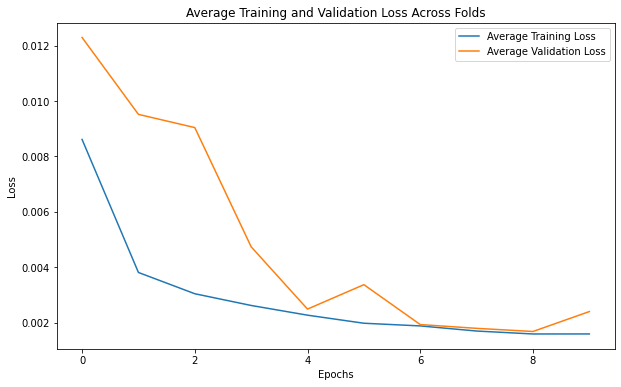

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, Flatten, TimeDistributed, Dropout
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError, RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

# Define the number of timesteps for the sequences and the list of features you want to include
n_timesteps = 120
features_list = ['spx_adj_close', 'jnj_adj_close', 'msft_adj_close', 
                'CCI', 'UE', 'FEDL01', 'jpm_20d_ma', 'jpm_rsi']

# Initialize the lists for sequences and targets
X, y = [], []

# Create sequences of 120 consecutive days for the selected features and the corresponding target
for i in range(n_timesteps, len(normalized_df)):
    X.append(normalized_df[features_list].iloc[i-n_timesteps:i].values)
    y.append(normalized_df['jpm_adj_close'].iloc[i])

# Convert the lists to numpy arrays
X, y = np.array(X), np.array(y)

# Reshape X to be in the form [samples, time steps, number_of_features]
X = np.reshape(X, (X.shape[0], X.shape[1], len(features_list)))

# Add a dimension to X to represent the single channel, required by Conv1D
X = np.reshape(X, (X.shape[0], X.shape[1], len(features_list), 1))

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Adjust n_features based on the number of features you're using
n_timesteps = 120
n_features = len(features_list)  # Ensure this matches the actual number of features you are using

# Function to define the model
def build_model(n_timesteps, n_features):
    model = Sequential()
    model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(n_timesteps, n_features, 1)))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.5))
    model.add(Dense(units=1))
    model.compile(optimizer=Adam(learning_rate=0.001), 
                loss='mean_squared_error',
                metrics=[
                    MeanSquaredError(),
                    MeanAbsoluteError(),
                    RootMeanSquaredError()
                ])
    return model

k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=False)

all_train_losses = []
all_val_losses = []

for train_index, test_index in kf.split(X):
    X_train_fold, X_val_fold = X[train_index], X[test_index]
    y_train_fold, y_val_fold = y[train_index], y[test_index]

    # Build and compile the model
    model = build_model(n_timesteps, n_features)

    # Train the model
    history = model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, 
                        validation_data=(X_val_fold, y_val_fold), verbose=0)
    
    # Collect the average loss per epoch for this fold
    all_train_losses.append(history.history['loss'])
    all_val_losses.append(history.history['val_loss'])

# Convert the lists of lists into 2D numpy arrays for easier averaging
all_train_losses = np.array(all_train_losses)
all_val_losses = np.array(all_val_losses)

# Calculate the mean loss per epoch across all folds
mean_train_losses = np.mean(all_train_losses, axis=0)
mean_val_losses = np.mean(all_val_losses, axis=0)

# Plot the average training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(mean_train_losses, label='Average Training Loss')
plt.plot(mean_val_losses, label='Average Validation Loss')
plt.title('Average Training and Validation Loss Across Folds')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [62]:
from sklearn.metrics import mean_absolute_error

predictions = model.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, predictions)

print(f"Mean Absolute Error (MAE): {mae}")

36/36 [==============================] - 2s 25ms/step
Mean Absolute Error (MAE): 0.02133151880669391


#### The RFECV method will automatically choose the number of features that resulted in the highest cross-validation score. This is the model's way of balancing the trade-off between too few features (underfitting) and too many (overfitting or unnecessary complexity). The lower the value (closer to 0), the better the model is at predicting the target variable. Because it's negative, a higher value on the plot actually means a lower absolute mean squared error, which is better. It looks like 8 features is a good number for the model but 1-2 is best.

36/36 [==============================] - 1s 38ms/step


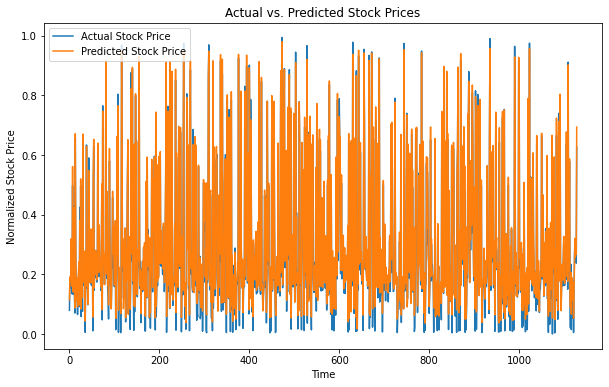

In [63]:
# Generate predictions for the test set
predictions = model.predict(X_test).flatten() # Flatten the predictions array if necessary

# Plotting actual vs. predicted stock prices
plt.figure(figsize=(10,6))
plt.plot(y_test, label='Actual Stock Price')
plt.plot(predictions, label='Predicted Stock Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Normalized Stock Price')
plt.legend()
plt.show()

## Deep Learning Model 2:
#### Adjusted Layer Arrangement and Activation Function
- In this first variation, we’ll replace the Conv1D and LSTM layers with GRU (Gated Recurrent Unit) layers, which are known to perform similarly to LSTMs but are computationally more efficient. We'll also change the activation function in the dense layer to ReLU instead of relu in convolutional layers for variety.

Epoch 1/10
189/189 [==============================] - 37s 128ms/step - loss: 0.0093 - mean_squared_error: 0.0093 - mean_absolute_error: 0.0659 - root_mean_squared_error: 0.0965 - val_loss: 5.9661e-04 - val_mean_squared_error: 5.9661e-04 - val_mean_absolute_error: 0.0170 - val_root_mean_squared_error: 0.0244
Epoch 2/10
189/189 [==============================] - 22s 113ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - mean_absolute_error: 0.0431 - root_mean_squared_error: 0.0646 - val_loss: 4.6514e-04 - val_mean_squared_error: 4.6514e-04 - val_mean_absolute_error: 0.0155 - val_root_mean_squared_error: 0.0216
Epoch 3/10
189/189 [==============================] - 25s 131ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - mean_absolute_error: 0.0405 - root_mean_squared_error: 0.0609 - val_loss: 7.3718e-04 - val_mean_squared_error: 7.3718e-04 - val_mean_absolute_error: 0.0164 - val_root_mean_squared_error: 0.0272
Epoch 4/10
189/189 [==============================] - 23s 123ms/step - lo

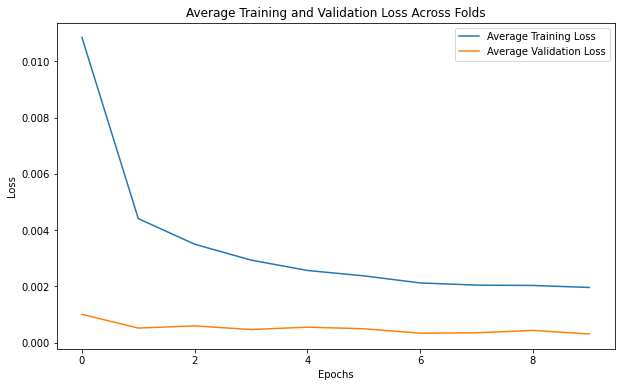

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError, RootMeanSquaredError
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np

# Assume n_timesteps and n_features are already defined, and X, y are prepared datasets
n_timesteps = 120  # Example, adjust as per your dataset
n_features = len(features_list)  # Ensure this matches the actual number of features you are using

# Define the model building function
def build_model_v1(n_timesteps, n_features):
    model = Sequential()
    model.add(GRU(64, return_sequences=True, input_shape=(n_timesteps, n_features)))
    model.add(GRU(32, return_sequences=False))
    model.add(Dropout(0.5))
    model.add(Dense(units=1, activation='relu'))  # Using ReLU in the output layer for regression
    model.compile(optimizer=Adam(learning_rate=0.001), 
            loss='mean_squared_error',
            metrics=[
                MeanSquaredError(),
                MeanAbsoluteError(),
                RootMeanSquaredError()
            ])
    return model

# K-Fold Cross Validation setup
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

all_train_losses = []
all_val_losses = []

# Loop through each fold
for train_index, test_index in kf.split(X):
    X_train_fold, X_val_fold = X[train_index], X[test_index]
    y_train_fold, y_val_fold = y[train_index], y[test_index]

    # Build and compile the model
    model = build_model_v1(n_timesteps, n_features)

    # Train the model
    history = model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, 
                        validation_data=(X_val_fold, y_val_fold), verbose=1)
    
    # Collect the average loss per epoch for this fold
    all_train_losses.append(history.history['loss'])
    all_val_losses.append(history.history['val_loss'])

# Convert the lists of lists into 2D numpy arrays for easier averaging
all_train_losses = np.array(all_train_losses)
all_val_losses = np.array(all_val_losses)

# Calculate the mean loss per epoch across all folds
mean_train_losses = np.mean(all_train_losses, axis=0)
mean_val_losses = np.mean(all_val_losses, axis=0)

# Plot the average training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(mean_train_losses, label='Average Training Loss')
plt.plot(mean_val_losses, label='Average Validation Loss')
plt.title('Average Training and Validation Loss Across Folds')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Deep Learning Model 3: Different Initializers and Activation Functions
- In the second variation, we will experiment with different initializers and include a BatchNormalization layer to stabilize the learning process. We'll use the he_normal initializer which is a good choice when using ReLU activation functions. We'll also use a sigmoid activation in the final layer since it can be beneficial in cases where the target variable has been normalized.


Epoch 1/10
189/189 [==============================] - 5s 12ms/step - loss: 0.0216 - mean_squared_error: 0.0216 - mean_absolute_error: 0.1038 - root_mean_squared_error: 0.1471 - val_loss: 0.0089 - val_mean_squared_error: 0.0089 - val_mean_absolute_error: 0.0834 - val_root_mean_squared_error: 0.0943
Epoch 2/10
189/189 [==============================] - 2s 8ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - mean_absolute_error: 0.0604 - root_mean_squared_error: 0.0815 - val_loss: 0.0053 - val_mean_squared_error: 0.0053 - val_mean_absolute_error: 0.0624 - val_root_mean_squared_error: 0.0725
Epoch 3/10
189/189 [==============================] - 1s 6ms/step - loss: 0.0047 - mean_squared_error: 0.0047 - mean_absolute_error: 0.0506 - root_mean_squared_error: 0.0688 - val_loss: 0.0041 - val_mean_squared_error: 0.0041 - val_mean_absolute_error: 0.0446 - val_root_mean_squared_error: 0.0637
Epoch 4/10
189/189 [==============================] - 1s 5ms/step - loss: 0.0044 - mean_squared_error: 0.

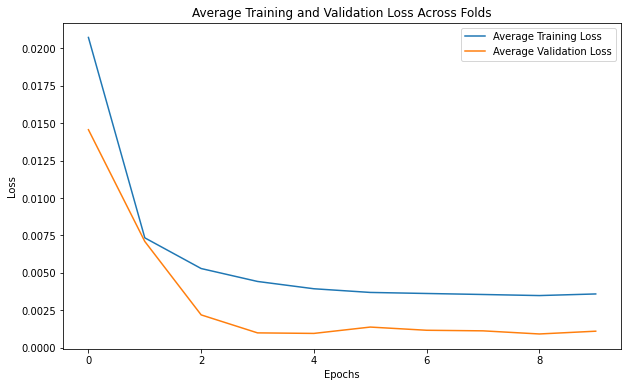

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError, RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import HeNormal
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np

# Assume n_timesteps and n_features are already defined, and X, y are prepared datasets
n_timesteps = 120  # Example, adjust as per your dataset
n_features = len(features_list)  # This should match the actual number of features in your dataset

def build_model_v2(n_timesteps, n_features):
    model = Sequential()
    # Remove the extra '1' if n_features already accounts for the channels dimension
    # If n_features is just the number of features without considering it as channels, you can add ', 1' if your data is indeed 1D per feature
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(units=50, activation='relu', kernel_initializer=HeNormal()))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(units=1, activation='sigmoid'))  # Using sigmoid in the output layer
    model.compile(optimizer=Adam(learning_rate=0.001), 
            loss='mean_squared_error',
            metrics=[
                MeanSquaredError(),
                MeanAbsoluteError(),
                RootMeanSquaredError()
            ])
    return model

# K-Fold Cross Validation setup
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

all_train_losses = []
all_val_losses = []

# Loop through each fold
for train_index, test_index in kf.split(X):
    X_train_fold, X_val_fold = X[train_index], X[test_index]
    y_train_fold, y_val_fold = y[train_index], y[test_index]

    # Build and compile the model
    model = build_model_v2(n_timesteps, n_features)

    # Train the model
    history = model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, 
                        validation_data=(X_val_fold, y_val_fold), verbose=1)
    
    # Collect the average loss per epoch for this fold
    all_train_losses.append(history.history['loss'])
    all_val_losses.append(history.history['val_loss'])

# Convert the lists of lists into 2D numpy arrays for easier averaging
all_train_losses = np.array(all_train_losses)
all_val_losses = np.array(all_val_losses)

# Calculate the mean loss per epoch across all folds
mean_train_losses = np.mean(all_train_losses, axis=0)
mean_val_losses = np.mean(all_val_losses, axis=0)

# Plot the average training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(mean_train_losses, label='Average Training Loss')
plt.plot(mean_val_losses, label='Average Validation Loss')
plt.title('Average Training and Validation Loss Across Folds')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Deep Learning Model 2 performs the best, so we will focus on tuning that model only

In [66]:
from keras_tuner import HyperModel
from tensorflow.keras.layers import GRU, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

class GRUHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = Sequential()
        model.add(GRU(units=hp.Int('units1', min_value=32, max_value=128, step=32),
                      return_sequences=True,
                      input_shape=self.input_shape))
        model.add(GRU(units=hp.Int('units2', min_value=16, max_value=64, step=16),
                      return_sequences=False))
        model.add(Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))
        model.add(Dense(units=1, activation='relu'))
        model.compile(
            optimizer=Adam(
                hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
            loss='mean_squared_error')
        return model

    def fit(self, hp, model, *args, **kwargs):
        return model.fit(
            *args,
            **kwargs,
            batch_size=hp.Choice('batch_size', values=[16, 32, 64]),
            epochs=10,
            verbose=1)

In [67]:
from keras_tuner import RandomSearch
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

tuner = RandomSearch(
    GRUHyperModel(input_shape=(n_timesteps, n_features)),
    objective='val_loss',
    max_trials=5,
    executions_per_trial=2,
    directory='my_dir',
    project_name='gru_tuning'
)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=3),
    ModelCheckpoint(
        filepath='best_model.h5',
        monitor='val_loss',
        save_best_only=True
    )
]

Reloading Tuner from my_dir\gru_tuning\tuner0.json


In [68]:
tuner.search(
    X_train, y_train,
    validation_data=(X_val, y_val),
    callbacks=callbacks
)

# After search completes
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 8 Complete [00h 08m 42s]
val_loss: 0.00024200991174438968

Best val_loss So Far: 0.00022954335872782394
Total elapsed time: 04h 41m 45s


In [2]:
best_model = tuner.hypermodel.build(best_hps)

# We can retrain the model with the best hyperparameters on the full dataset
history = best_model.fit(
    X, y,
    validation_split=0.2,  # Assuming you want to keep some data for validation
    epochs=10,  # Or however many epochs you decide
    callbacks=callbacks,
    batch_size=best_hps.get('batch_size'),
    verbose=1
)

NameError: name 'tuner' is not defined